# Programming for Data Analytics 

# Project - To Synthesise a Data Set which simulates a real-world phenomenon

## Introduction

This project is modelled on the business activites of the Office of Government Procurement's Education department.

The following is a simulation of a data set recording the capital projects of five Irish universities in 2017:
 - University College Dublin (UCD)
 - Dublin City University (DCU)
 - University of Limerick (UL)
 - Trinity College Dublin (TCD)
 - National University of Ireland Galway (NUIG)

These projects are for five categories:
 - Laboratory
 - Agriculture
 - Veterinary
 - Library
 - Education Specific
 
These capital projects have a minimum value of €25,000 and a maximum value of €1,000,000.  The projects are allocated to one of four individuals.  The duration of the projects is between 21 and 60 days.  Project start dates are all in 2017.

The project analyses a randomly generated data set which is based on the above information. The aim of the analysis is to investigate the category which is the most beneficial to the organisation based on:
 - university demand, 
 - the capital spend, 
 - the time spent by employees completing the projects.  
 
It is also hoped that an analysis of the start dates of the projects will allow the organisation to allocate staff accordingly, ie to ensure adequate staff are available at times of high demand.


## Creating the Random Data Set

Import the Pandas, Numpy, Matplotlib and Datetime libraries

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [160]:
import datetime

Enable matplotlib graphs to be displayed

In [7]:
%matplotlib inline

Create a random seed to fix the randomly generated data to specifc values each time it is run

In [8]:
np.random.seed(0)

Set up the lists of University Names, Category Names and Employee Names to be used

In [9]:
uni_name = ['UL', 'TCD', 'DCU', 'UCD', 'NUIG']

In [10]:
cat_name = ['Vet', 'Agric', 'Lab', 'Library', 'Specific']

In [11]:
ee_name = ['Ann', 'Mary', 'Tom', 'John', 'Mark']

Create 26 random dates as the start dates for each randomly generated project

In [12]:
def random_dates(start, end, n=26):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2018-01-01')


Create the random data set which randomly chooses 26 projects broken down into a University, Category, random spend value between €25,000 and €1,000,000, random start date within the year 2017, a random duration for completing the project of between 21 and 60 days and a randomly assigned specialist to complete each project.

In [13]:
raw_data = {'University': np.random.choice(uni_name, 26), 
        'Category': np.random.choice(cat_name, 26), 
        'Spend': np.random.randint(25000, 1000000, 26),
        'Start': random_dates(start, end),
            'Duration': np.random.randint(21,60, 26),
        'Specialist': np.random.choice(ee_name, 26)}
df = pd.DataFrame(raw_data, columns = ['University', 'Category', 'Spend', 'Start', 'Duration', 'Specialist'])


Create a random seed to fix the randomly generated data to specifc values each time it is run

In [14]:
np.random.seed(0)

Save the randomly created data set as a csv file so the data frame can be analysed

In [15]:
df.to_csv('unispend.csv')

Read the csv file back to this jupyter notebook

In [16]:
data = pd.read_csv("unispend.csv")

Delete the extra column which was added to the date set when the csv file was read back into the notebook

In [17]:
data.drop('Unnamed: 0',axis=1, inplace=True)

## Analysing the Random Data Set

### University Capital Projects 2017 - Random Data Set
The below table illustrates the details of 26 capital projects undertaken by the organisation on behalf of five Irish universities.

In [18]:
data # to print the random data set

,University,Category,Spend,Start,Duration,Specialist
0,NUIG,Vet,595810,2017-06-04 16:50:20,57,John
1,UL,Agric,138183,2017-08-21 04:30:28,55,Ann
2,UCD,Library,111904,2017-07-05 04:29:40,50,John
3,UCD,Library,45737,2017-06-13 15:02:00,24,Tom
4,UCD,Library,546537,2017-01-16 05:10:38,55,John
5,TCD,Vet,709007,2017-09-25 02:33:51,34,Ann
6,UCD,Agric,741713,2017-10-23 15:39:00,42,Ann
7,DCU,Agric,379361,2017-04-22 06:08:35,30,Ann
8,NUIG,Agric,105163,2017-11-11 07:09:46,21,John
9,UL,Vet,299278,2017-05-16 04:35:35,31,Tom


The data set comprises of 26 lines and 6 columns

In [19]:
data.shape

(26, 6)

### Project Spend & the Project Length

 - There were 26 projects in 2017.
 <br>
 - The **lowest project spend** in 2017 was €45,737.
 - The **highest project spend** in 2017 was €922,798.
 - The **average project spend** €498,211.
 <br>
 - The **shortest project length** was 21 days.
 - The **longest project length** was 57 days.
 - The **average project length** was 41 days to completion.

In [20]:
data.describe()

,Spend,Duration
count,26.000000,26.000000
mean,498211.192308,40.846154
std,286122.310686,12.450517
min,45737.000000,21.000000
25%,251768.500000,31.000000
50%,554098.500000,41.500000
75%,739327.500000,54.000000
max,922798.000000,57.000000


### University Project Breakdown

In [21]:
customers = data[['University','Spend','Start']] # Define 'customers'


### Projects per University
The 26 projects were divided as below, with UCD and UL having the majority of projects with 7 each.  The lowest amount of projects were submitted by DCU with 3 projects in total.

In [22]:
customer_group = customers.groupby('University')
customer_group.size()

University
DCU     3
NUIG    4
TCD     5
UCD     7
UL      7
dtype: int64

### Total Capital Spend 2017
The total capital spend for the 26 projects was €12,953,491.

In [23]:
data.loc['Total'] = pd.Series(df['Spend'].sum(), index = ['Spend'])
data

,University,Category,Spend,Start,Duration,Specialist
0,NUIG,Vet,595810.0,2017-06-04 16:50:20,57.0,John
1,UL,Agric,138183.0,2017-08-21 04:30:28,55.0,Ann
2,UCD,Library,111904.0,2017-07-05 04:29:40,50.0,John
3,UCD,Library,45737.0,2017-06-13 15:02:00,24.0,Tom
4,UCD,Library,546537.0,2017-01-16 05:10:38,55.0,John
5,TCD,Vet,709007.0,2017-09-25 02:33:51,34.0,Ann
6,UCD,Agric,741713.0,2017-10-23 15:39:00,42.0,Ann
7,DCU,Agric,379361.0,2017-04-22 06:08:35,30.0,Ann
8,NUIG,Agric,105163.0,2017-11-11 07:09:46,21.0,John
9,UL,Vet,299278.0,2017-05-16 04:35:35,31.0,Tom


#### UCD had the highest total project spend at €3,546,865.
#### DCU had the lowest total project spend at €726,400.  
#### The histograph below illustrates the total spend in 2017 per university by descending value.

In [24]:
sales_totals = customer_group.sum()
sales_totals.sort_values('Spend').head()

,Spend
University,
DCU,726400
NUIG,2049919
TCD,3277082
UL,3353225
UCD,3546865


Text(0,0.5,'Project Spend (€)')

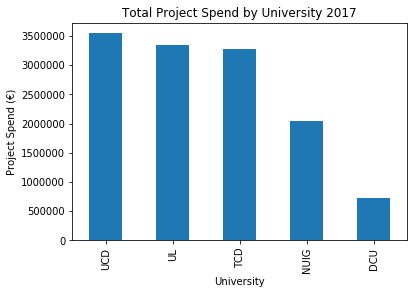

In [25]:
my_plot = sales_totals.sort_values('Spend',ascending=False).plot(kind='bar',legend=None,title="Total Project Spend by University 2017")
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend (€)")

In [26]:
customers = data[['University', 'Category', 'Spend','Start']] # redefine customers adding category


'Category group' is defined as the total spend of each university by category

In [27]:
category_group = customers.groupby(['University','Category']).sum()


### Category Spend
The category spend for each university can be seen in the below table and histogram:
 - UCD had the highest spend in Agriculture
 - UL had the highest spend in Laboratory
 - TCD had the highest spend in Library
 - UL had the highest spend in Education Specific projects
 - Trinity had the highest spend in Veterinary.

In [28]:
category_group.unstack().head()

Spend                                          
Category        Agric       Lab   Library   Specific        Vet
University                                                     
DCU          615293.0       NaN  111107.0        NaN        NaN
NUIG         105163.0       NaN       NaN  1348946.0   595810.0
TCD               NaN  437556.0  874792.0   821213.0  1143521.0
UCD         1636136.0  783915.0  704178.0        NaN   422636.0
UL           138183.0  805054.0       NaN  1534165.0   875823.0

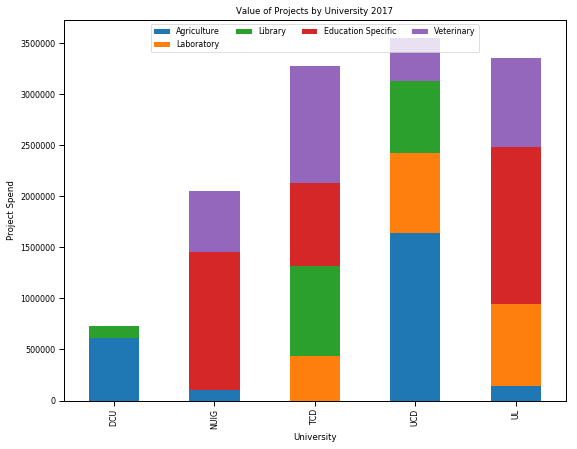

In [185]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Value of Projects by University 2017",figsize=(9, 7))
my_plot.set_xlabel("University")
my_plot.set_ylabel("Project Spend")
my_plot.legend(["Agriculture","Laboratory","Library","Education Specific", "Veterinary"], loc=9,ncol=4)

### Project Breakdown per Specialist
As can be seen in the table below, Ann's projects had the highest total capital spend.  The breakdown of the projects and the total project spend per employee can be seen in the below histogram

In [186]:
employees = data[['Specialist', 'University', 'Spend','Start']]


In [187]:
employees_group = employees.groupby(['Specialist','University']).sum()


In [188]:
employees_group.unstack()

Spend                                            
University       DCU       NUIG        TCD        UCD         UL
Specialist                                                      
Ann         379361.0  1348946.0  1583799.0  1164349.0  2404519.0
John             NaN   700973.0   872070.0  1552864.0    72883.0
Mark        111107.0        NaN        NaN        NaN        NaN
Tom         235932.0        NaN   821213.0   829652.0   875823.0

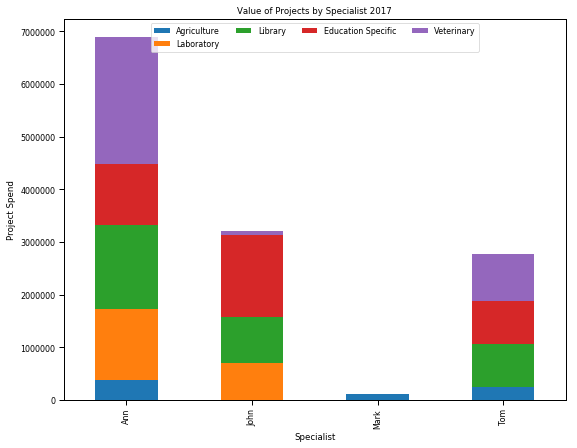

In [189]:
my_plot = employees_group.unstack().plot(kind='bar',stacked=True,title="Value of Projects by Specialist 2017",figsize=(9, 7))
my_plot.set_xlabel("Specialist")
my_plot.set_ylabel("Project Spend")
my_plot.legend(["Agriculture","Laboratory","Library","Education Specific", "Veterinary"], loc=9,ncol=4)

### Project Schedules
When the start dates and the value of the projects were analysed in the line plot below, it can be seen the projects with the highest value can be found at the start (Jan/Feb/Mar 2017) and the end of the year (Aug/Sept/Oct/Nov/Dec 2017).  This would suggest the between April and July inclusive would be the best time to schedule annual leave for staff.

In [190]:
data['datetime'] = pd.to_datetime(data['Start'])


In [191]:
import seaborn as sns

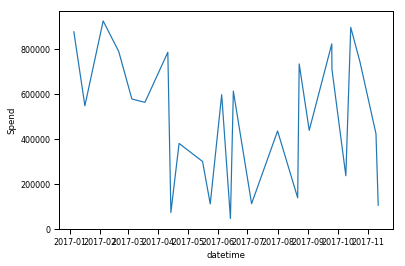

In [192]:
sns.lineplot(x = "datetime", y = "Spend", data = data)

### In the below graph each University's individual projects spend and the duration of each project are plotted.

C:\Users\Windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


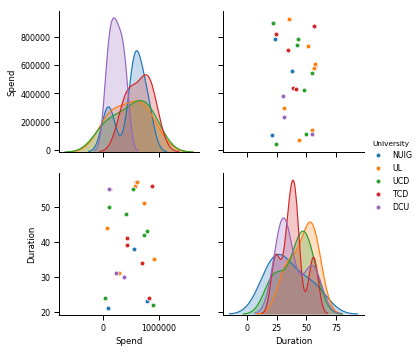

In [193]:
sns.pairplot(data, hue='University')

### In the below graph each Categorie's individual projects spend and the duration of each project are plotted.

C:\Users\Windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


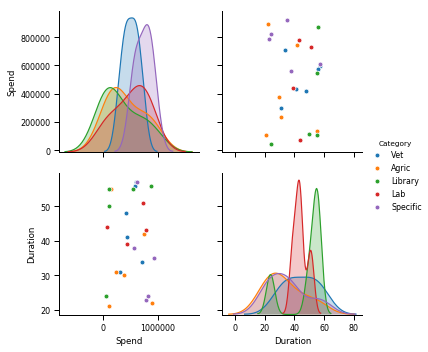

In [195]:
sns.pairplot(data, hue='Category')

### In the below graph each Specialist's individual projects spend and the duration of each project are plotted.

C:\Users\Windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Windows\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Windows\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Windows\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Windows\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: Run

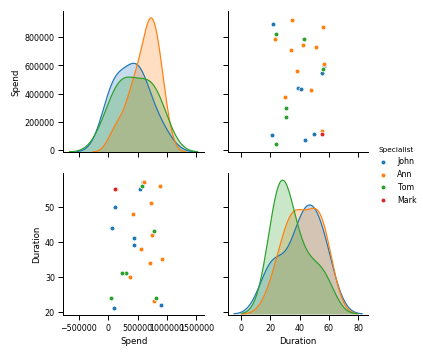

In [194]:
sns.pairplot(data, hue='Specialist')

## Conclusion

When the synthesised data set was analysed it was found that 
- UCD had the highest capital spend on projects in 2017.
- The value of the average project was €498,211.
- The average project took 41 days to complete.
- None of the universities submitted projects for every category.
- UCD and UL submitted the most projects in the year at 7 projects each.
- DCU submitted the least, at only 3 projects.
- Ann's projects were more than twice the value of any other specialist.
- Between April and July 2017 the projects completed had the lowest capital spend.  


In conclusion, the above synthesied data set simulates a sample of the actual capital projects submitted by Irish universities to the organisation in 2017.  It accurately simulates the categories, values and timeframes taken to complete projects.  

## References

https://www.daveoncode.com/2013/05/20/generate-random-dates-in-python-using-datetime-and-random-modules/<br>
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html<br>
https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib<br>
https://realpython.com/python-histograms/<br>
https://stackoverflow.com/questions/34347145/pandas-plot-doesnt-show<br>
http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot<br>
https://stackoverflow.com/questions/47487753/when-is-it-appropriate-to-use-df-value-counts-vs-df-groupby-count<br>
https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/<br>
https://towardsdatascience.com/exploratory-data-analysis-with-pandas-and-jupyter-notebooks-36008090d813<br>
https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190<br>
http://pbpython.com/simple-graphing-pandas.html<br>
https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas<br>
https://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
https://www.youtube.com/watch?v=0xVqLJe9_CY <br>
https://www.ritchieng.com/creating-dataframe-from-objects/ <br>
https://stackoverflow.com/questions/32752292/how-to-create-a-data-frame-of-random-integers-with-pandas <br>
https://stackoverflow.com/questions/47464362/how-to-fill-pandas-dataframe-columns-with-random-dictionary-values<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html<br>
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/ <br>
https://stackoverflow.com/questions/4394145/picking-a-random-word-in-python <br>
https://www.pythoncentral.io/select-random-item-list-tuple-data-structure-python/ <br>
https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger<br>